In [78]:
import numpy

from finance_utils.namedtuples import *
from finance_utils.uniontypes import *
from finance_utils.asset.spot.base import Spot,ServiceChargesSpot, SpotTradeBookUnit
# from finance_utils.asset.spot.strategy import SpotCostAveragingPlan
from finance_utils.strategy.dca import simple_dca, price_qualified_dca

from finance_utils.process.prices.gbm import RVDecoupledGBM, GBM, NormalDistribution
from finance_utils.trader.base import Trader, TradeBookUnit
from finance_utils.trader.utility import *

from data_utils.stochastic_utils.distributions.nonParametricDistribution import HistogramDist, KernelMixDist, SmoothHisDist
from data_utils.stochastic_utils.random_process.correlatedRandom import random_correlated_series
from easy_datetime.timestamp import TimeStamp
import tqdm

from matplotlib import pyplot

In [87]:
p=GBM("stock", 1, 0.03/264, 0.03, 264, TimeStamp.now().accurate_to("year"), "day", 1)
stock = ServiceChargesSpot("stock", 100, TradeDelta("day", 1))

In [88]:
# trigger_set = set(range(0,264,22))
trader = Trader("trader", 200 * 264, None)
ylist = []
for i,t,path in p.process_iter():
    # _,_ = simple_dca(p.s0, i, t, path, stock, trader, 10000, trigger_set)
    stock.purchased_to(trader, path.price, 200, t)
    ylist.append(trader.net_worth_rate(**path.dic))

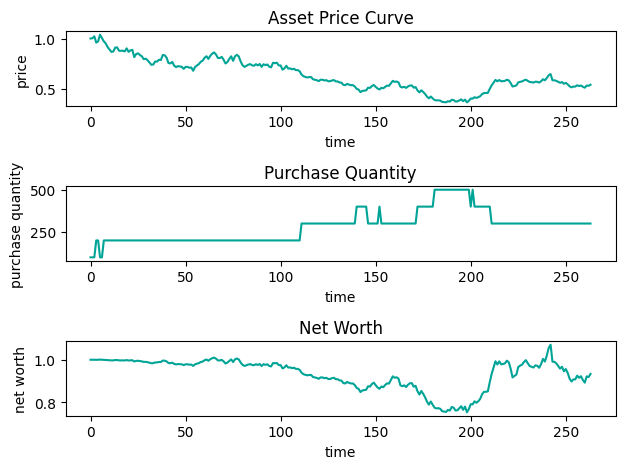

In [89]:
plist= []
slist = []
for b in trader.position[stock.name].book:
    b:SpotTradeBookUnit
    plist.append(b.price)
    slist.append(b.shares)
# numpy.column_stack((
#     numpy.array(plist),
#     numpy.array(slist)
# ))
pyplot.subplot(3,1,1)
pyplot.title("Asset Price Curve")
pyplot.plot(plist, color="#00a497")
pyplot.xlabel("time")
pyplot.ylabel("price")
pyplot.subplot(3,1,2)
pyplot.title("Purchase Quantity")
pyplot.plot(slist, color="#00a497")
pyplot.xlabel("time")
pyplot.ylabel("purchase quantity")
pyplot.subplot(3,1,3)
pyplot.plot(ylist, color="#00a497")
pyplot.title("Net Worth")
pyplot.xlabel("time")
pyplot.ylabel("net worth")
pyplot.tight_layout()
pyplot.show()